In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [3]:
titan_train = pd.read_csv('../../Dataset/Titanic/train.csv')
titan_test = pd.read_csv('../../Dataset/Titanic/test.csv')
titan_train.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


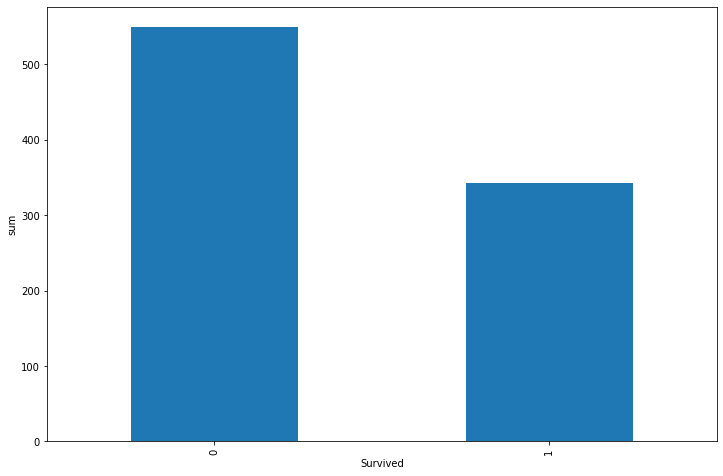

In [4]:
ax = titan_train['Survived'].value_counts().plot(kind='bar', figsize=(12, 8))
ax.set_xlabel(xlabel='Survived')
ax.set_ylabel(ylabel='sum')
plt.show()

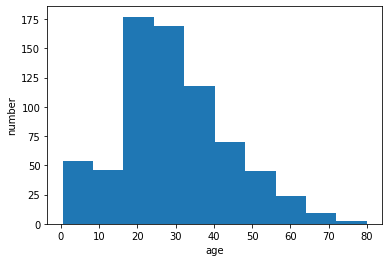

In [5]:
ax = titan_train['Age'].plot.hist()
ax.set_xlabel('age')
ax.set_ylabel('number')
plt.show()

Text(0, 0.5, 'density')

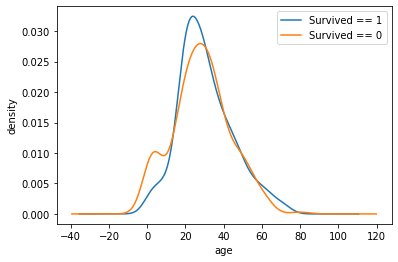

In [6]:
ax = titan_train.query('Survived == 0')['Age'].plot.density()
titan_train.query('Survived == 1')['Age'].plot.density()
ax.legend(['Survived == 1', 'Survived == 0'])
ax.set_xlabel('age')
ax.set_ylabel('density')


In [7]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(titan_train)
y_train = titan_train['Survived'].values

x_test = preprocessing(titan_test)
# y_test = titan_test['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )


x_train.shape = (891, 15)
x_test.shape = (418, 15)


In [8]:
#使用Sequential 建立模型
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15, )))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [9]:
#配置模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

#进行训练
history = model.fit(x_train, y_train, batch_size=64, epochs=300, validation_split=0.2)

Epoch 1/300
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
12/12 [==============================] - 0s 22ms/step - loss: 1.9570 - auc: 0.5858 - val_loss: 1.2879 - val_auc: 0.6607
Epoch 2/300
12/12 [==============================] - 0s 3ms/step - loss: 1.3088 - auc: 0.5596 - val_loss: 0.9514 - val_auc: 0.6473
Epoch 3/300
12/12 [==============================] - 0s 4ms/step - loss: 1.0074 - auc: 0.5798 - val_loss: 0.7860 - val_auc: 0.6811
Epoch 4/300
12/12 [==============================] - 0s 4ms/step - loss: 0.8886 - auc: 0.6012 - val_loss: 0.7010 - val_auc: 0.7032
Epoch 5/300
12/12 [==============================] - 0s 4ms/step - loss: 0.8321 - auc: 0.6248 - val_loss: 0.6583 - val_auc: 0.7240
Epoch 6/300
12/12 [==============================] - 0s 4ms/step - loss: 0.7974 - auc: 0.6280 - val_loss: 0.6520 - val_auc: 0.7092
Epoch 7/300
12/12 [==============================] - 0s 4ms/step - loss: 0.7693 - auc: 0.6314 - val_loss: 0.6256 - val_auc: 0.7194
E

In [10]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
# loss 展示
# History 官网API不完善
# history.history()

In [19]:
#模型保存和提取
model.save_weights('./model/tf_save_weight', save_format='tf') #这种方法不能和load_model配合使用
# model.save()
model.save('./weight/tf_save_model', save_format='tf')

NameError: name 'model' is not defined

In [14]:
del model

In [15]:
model = models.load_model('./weight/tf_save_weight')

In [16]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [17]:
del model

In [18]:
model = models.load_model('./weight/tf_save_model')

OSError: SavedModel file does not exist at: ./weight/tf_save_model/{saved_model.pbtxt|saved_model.pb}